In [31]:
import numpy as np
import matplotlib.pyplot as plt 

In [32]:
# Cilj nam je da integralimo, numericki, jednacinu prenosa zracenja i da od 
# tabulisanih vrednosti opticke dubine i funkcije izvora dobijemo izlazni intenzitet

# U procesu cemo dobiti i intenzitet svuda u atmosferi, na datom pravcu. 

In [106]:
# Zadajmo neko tau i S 

# Prirodna skala optickih dubina (zbog hidrostaticke ravnoteze, 
# odnosno eksponencijalne stratifikacije) je log scala
logtau = np.linspace(-6,2,801)
tau = 10.0**logtau
print(tau)

[1.00000000e-06 1.02329299e-06 1.04712855e-06 1.07151931e-06
 1.09647820e-06 1.12201845e-06 1.14815362e-06 1.17489755e-06
 1.20226443e-06 1.23026877e-06 1.25892541e-06 1.28824955e-06
 1.31825674e-06 1.34896288e-06 1.38038426e-06 1.41253754e-06
 1.44543977e-06 1.47910839e-06 1.51356125e-06 1.54881662e-06
 1.58489319e-06 1.62181010e-06 1.65958691e-06 1.69824365e-06
 1.73780083e-06 1.77827941e-06 1.81970086e-06 1.86208714e-06
 1.90546072e-06 1.94984460e-06 1.99526231e-06 2.04173794e-06
 2.08929613e-06 2.13796209e-06 2.18776162e-06 2.23872114e-06
 2.29086765e-06 2.34422882e-06 2.39883292e-06 2.45470892e-06
 2.51188643e-06 2.57039578e-06 2.63026799e-06 2.69153480e-06
 2.75422870e-06 2.81838293e-06 2.88403150e-06 2.95120923e-06
 3.01995172e-06 3.09029543e-06 3.16227766e-06 3.23593657e-06
 3.31131121e-06 3.38844156e-06 3.46736850e-06 3.54813389e-06
 3.63078055e-06 3.71535229e-06 3.80189396e-06 3.89045145e-06
 3.98107171e-06 4.07380278e-06 4.16869383e-06 4.26579519e-06
 4.36515832e-06 4.466835

In [89]:
# Linearna zavisnost S od tau u stvari nema mnogo smisla oko ovako velikog
# raspona tau. Pa cemo reci da S zavisi linearno od log tau 

In [107]:
S = 8 + logtau # u nekim jedinicama

Text(0, 0.5, 'Funkcija izvora')

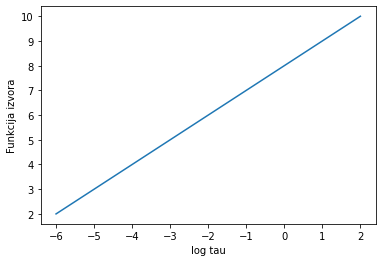

In [91]:
plt.plot(logtau, S)
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")

In [92]:
# Shema za numericku integraciju:

def solve_rte(S, tau, mu):
    
    ND = len(S)
    
    I = np.zeros(ND)
    # postavimo donji granicni uslov. Pogledaj u knjizi detaljnije, ali ok 
    # aproksimacija je da je: 
    I[ND-1] = S[ND-1]
    
    for i in range(ND-2,-1,-1):
        
        delta = (tau[i+1] - tau[i]) / mu
        
        w_i = 1.0 - 1./delta + np.exp(-delta)/delta
        w_ip = 1./delta - np.exp(-delta)/delta - np.exp(-delta)
        
        if (delta<1E-2):
            w_i = delta/2.0
            w_ip = delta/2.0 - delta**2.0/2.0
            
        I[i] = I[i+1] * np.exp(-delta) + w_i * S[i] + w_ip * S[i+1]
        
    return I

In [93]:
I0 = solve_rte(S,tau,1.0)

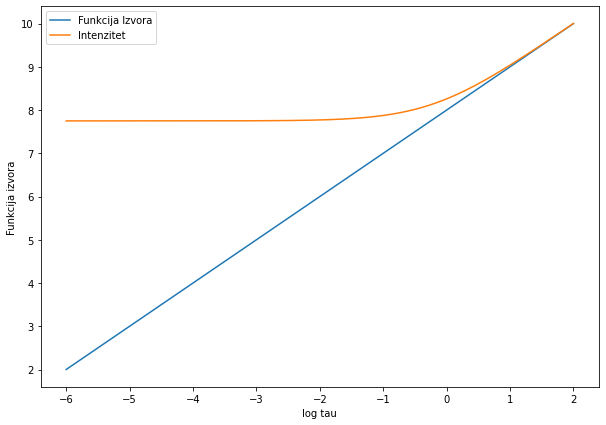

In [96]:
plt.figure(figsize=[10,7])
plt.plot(logtau, S, label='Funkcija Izvora')
plt.plot(logtau, I0, label='Intenzitet')
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")
plt.legend()

In [97]:
# Mi mozemo da malo perturbujemo S u jednoj po jednoj tacki, pa da vidimo kako ta
# perturbacija utice na izlazni intenzitet. 

In [98]:
dI_dS = np.zeros(len(S))

for d in range(len(S)):
    
    S[d] += 0.01
    
    I = solve_rte(S, tau, 1.0)
    
    dI_dS[d] = (I[0] - I0[0]) / 0.01
    
    S[d] -= 0.01

Text(0, 0.5, 'dI/dS')

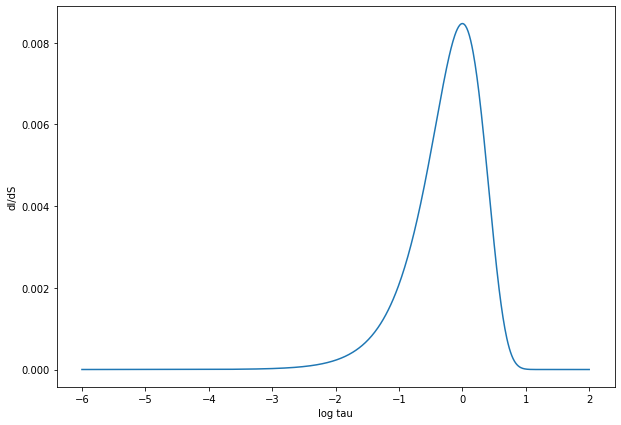

In [99]:
plt.figure(figsize=[10,7])
plt.plot(logtau, dI_dS)
plt.xlabel("log tau")
plt.ylabel("dI/dS")

In [108]:
skala_perturbacije = 0.1 # u jedinicama log tau

S_pert = S + 0.5 * np.sin(2.0*np.pi * logtau / 0.1)

In [101]:
I_pert = solve_rte(S_pert,tau, 1.0)

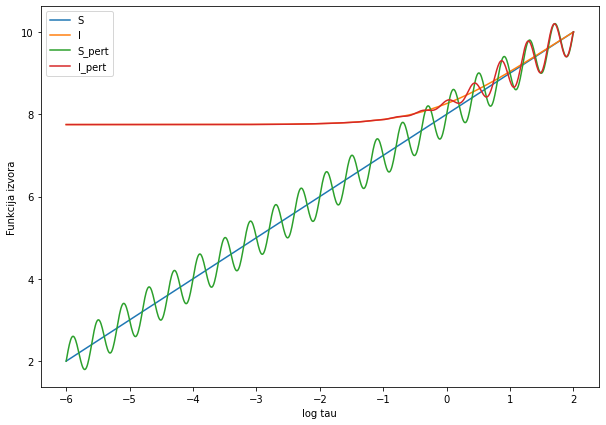

In [102]:
plt.figure(figsize=[10,7])
plt.plot(logtau, S, label='S')
plt.plot(logtau, I0, label='I')
plt.plot(logtau, S_pert, label='S_pert')
plt.plot(logtau, I_pert, label='I_pert')
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")
plt.legend()

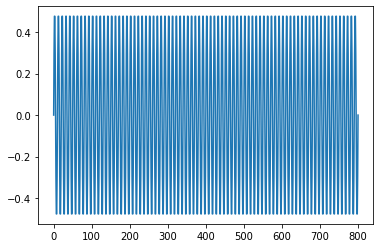

In [109]:
plt.plot(S_pert-S)

In [104]:
tau = np.linspace(0,10,100001)
S = 1.0 + tau

In [10]:
# Kako bismo ovo uradili RK metodom: 

def solve_rte_rk(S, tau, mu):
    
    ND = len(tau)
    
    I = np.zeros(ND)
    I[-1] = S[-1] # granicni uslov
    
    # Integralimo na gore
    
    for i in range(ND-2,-1,-1):
        
        h = tau[i+1] - tau[i]
        
        k1 = h * (I[i+1] - S[i+1])
        
        k2 = h * (I[i+1] + k1/2.0 - S[i+1]*0.5 - S[i] * 0.5)
        
        k3 = h * (I[i+1] + k2/2.0 - S[i+1]*0.5 - S[i] * 0.5)
        
        k4 = h * (I[i+1] + k3 - S[i])
        
        deltaI = 1./6. * (k1 + 2.0 * k2 + 2.0 * k3 + k4)
        
        I[i] = I[i+1] - deltaI
        
    return I

In [11]:
Irk = solve_rte_rk(S, tau, 1.0)

In [12]:
I = solve_rte(S, tau, 1.0)

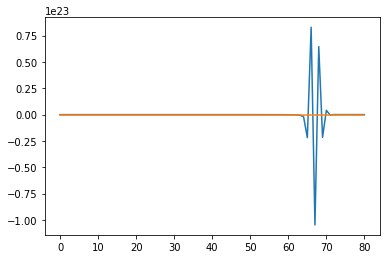

In [13]:
plt.plot(Irk)
plt.plot(I)

In [14]:
# Ok da ovom sada malo detaljnije ispitamo, izvucicemo jedan model 
# sunca iz fajla i isplotovacemo tau, S, i izracunati I
# onda cemo izracunati I za razlicite mu pa cemo videti kako se I 
# menja sa mu i dubinu

In [15]:
atmos = np.loadtxt("falc_71.dat",unpack=True,skiprows=1)

In [16]:
atmos.shape

(12, 71)

In [17]:
# 12 su parametri
# 71 su dubine
# Parametri imaju sledece znacenje: 
# 0 - log tau u kontinuumu
# 1 - visina u cm 
# 2 - temperatura u K 
# 3 - pritisak gasa u dyn/cm^2 
# 4 - pritisak elektrona u dyn/cm^2 
# 5 - nemam pojma nije ni bitno (mozda gustina)
# 6 - isto to 
# 7 - magnetno polje nije vazno, nula je 
# 8 - mikroturbulentna brzina - trebace nam kada budemo radili linije
# 9 - radijalna brzina, nula je ali moze isto da bude vazna za linije 
# 10 - inklinacija magnetnog polja - nije bitn osada 
# 11 - azimuth magnetnog polja - nije bitan sada 

# Nama trebau samo tau i T, pretpostavicemo da je tau dato na talasnoj duzini 500 nm
# pa cemo izracunati funkciju izvora iz temperature na toj tal. duzini, koriscenjem 
# plankovog zakona

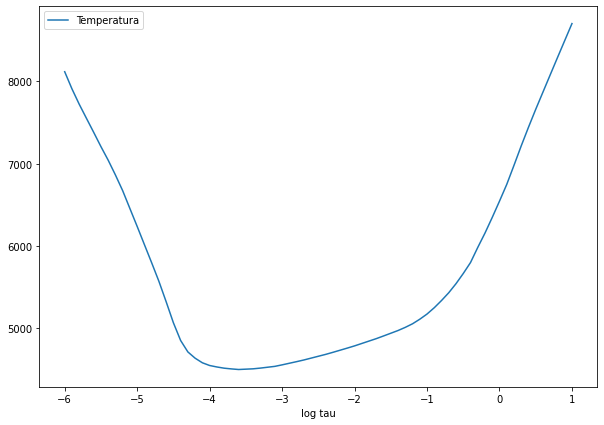

In [18]:
plt.figure(figsize=[10,7])
plt.plot(atmos[0], atmos[2], label='Temperatura')
plt.xlabel("log tau")
plt.legend()

In [19]:
def planck(ll, T):
    
    h = 6.6266E-27
    k = 1.38E-16
    c = 2.997E10 # ovo je sve u CGS sistemu
    
    B = 2*h*c**2.0 / ll**5.0 * 1./(np.exp(h*c/ll/k/T) - 1.0)
    
    return B



In [20]:
S = planck(500E-7, atmos[2])

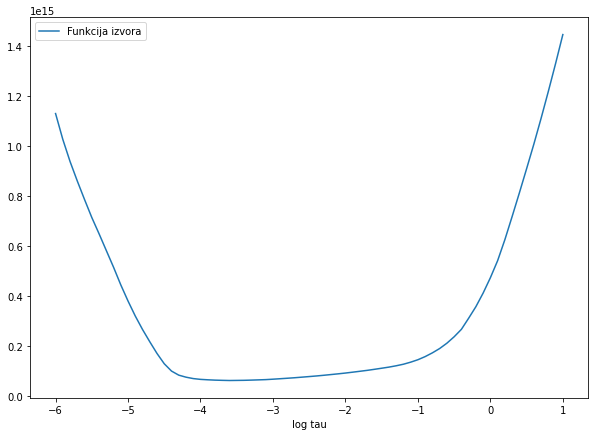

In [21]:
plt.figure(figsize=[10,7])
plt.plot(atmos[0], S, label='Funkcija izvora')
plt.xlabel("log tau")
plt.legend()

In [22]:
# Hajde ovo da integralimo:
I = solve_rte(S, 10.0**atmos[0],1.0)

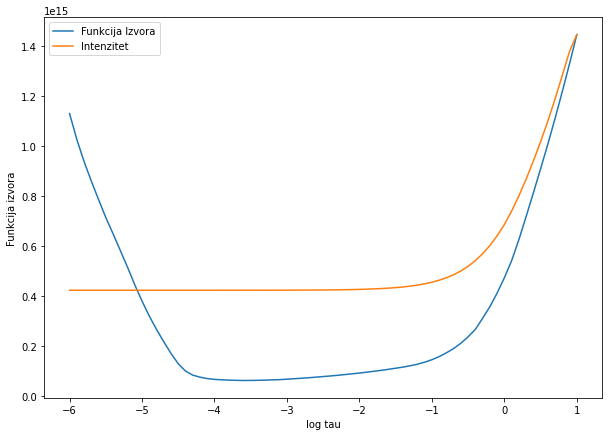

In [23]:
logtau = atmos[0]

plt.figure(figsize=[10,7])
plt.plot(logtau, S, label='Funkcija Izvora')
plt.plot(logtau, I, label='Intenzitet')
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")
plt.legend()

In [24]:
# A sta bi bilo, ako bismo zamilili da se sve ovo desava na nekoj talasnoj duzini
# koja je recimo 1000 puta neprozirnija nego ova nasa?

In [25]:
I = solve_rte(S, 100000.*10.0**atmos[0],1.0)

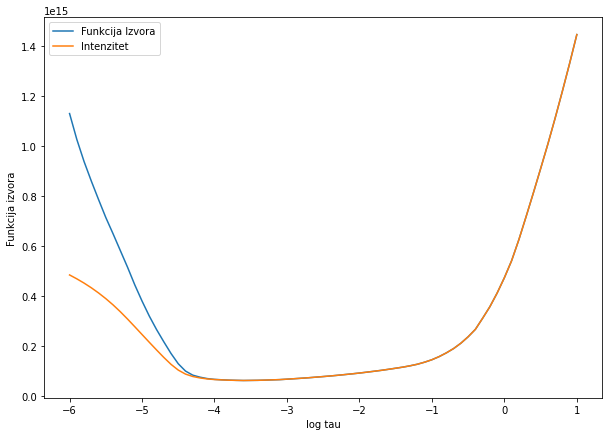

In [26]:
plt.figure(figsize=[10,7])
plt.plot(logtau, S, label='Funkcija Izvora')
plt.plot(logtau, I, label='Intenzitet')
plt.xlabel("log tau")
plt.ylabel("Funkcija izvora")
plt.legend()

In [27]:
# poslednja stvar, a sta sa zavisnoscu od mu? 

# pa hajde da ovo resimo za neki grid vrednosti mu

mu = np.linspace(0.1,1.0,10)
full_int = np.zeros([10,len(S)])

In [28]:
for m in range(0,10):
    full_int[m] = solve_rte(S,100000*10.0**logtau,mu[m])

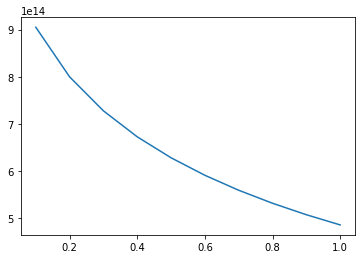

In [29]:
plt.plot(mu, full_int[:,0])

In [ ]:
# ovo bi bio tzv limb brightening 